<a href="https://colab.research.google.com/github/shreyasstha/data/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data cleaning

In [2]:
import pandas as pd
df = pd.read_csv('/content/student_info.csv')
print(df)

     Name   Age Grade  Gender  Subject  Score
0   Alice  20.0     A  Female    Maths   88.0
1     Bob  19.0   NaN    Male      NaN   75.0
2   Alice   NaN     B    Male  Science    NaN
3   David  21.0     A     NaN  English   92.0
4     Bob  22.0     C  Female   Nepali   68.0
5   Frank  20.0     B    Male   Social   80.0
6   David   NaN     A  Female      NaN   85.0
7  Hannah  23.0   NaN  Female   Health    NaN
8  Hannah  21.0     B     NaN  English   77.0
9   David  20.0     C    Male   Nepali   79.0


In [3]:
print(df.columns)


Index(['Name', 'Age', 'Grade', 'Gender', 'Subject', 'Score'], dtype='object')


In [4]:
print(df.isnull().sum())


Name       0
Age        2
Grade      2
Gender     2
Subject    2
Score      2
dtype: int64


In [5]:
#dropped the column with NaN
df_cleaned = df.dropna()
print(df_cleaned)


    Name   Age Grade  Gender Subject  Score
0  Alice  20.0     A  Female   Maths   88.0
4    Bob  22.0     C  Female  Nepali   68.0
5  Frank  20.0     B    Male  Social   80.0
9  David  20.0     C    Male  Nepali   79.0


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [7]:
df['Grade']= df['Grade'].fillna(df['Grade'].mode()[0])



In [8]:
df['Gender']= df['Gender'].fillna('Not Specified')


In [9]:
df['Score'] = df['Score'].fillna(df['Score'].median())


In [11]:
df['Subject'] = df['Subject'].fillna("Moral")

In [ ]:
#df['Age'] = df['Age'].fillna(13)


In [12]:
print(df)

     Name    Age Grade         Gender  Subject  Score
0   Alice  20.00     A         Female    Maths   88.0
1     Bob  19.00     A           Male    Moral   75.0
2   Alice  20.75     B           Male  Science   79.5
3   David  21.00     A  Not Specified  English   92.0
4     Bob  22.00     C         Female   Nepali   68.0
5   Frank  20.00     B           Male   Social   80.0
6   David  20.75     A         Female    Moral   85.0
7  Hannah  23.00     A         Female   Health   79.5
8  Hannah  21.00     B  Not Specified  English   77.0
9   David  20.00     C           Male   Nepali   79.0


In [13]:
df.to_csv("cleaned_students.csv", index=False)


#grouped by

In [16]:
#sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
grouped = df[df["Subject"] == "English"]["Score"].mean()
print(grouped)
print(df)

84.5
     Name    Age Grade         Gender  Subject  Score
0   Alice  20.00     A         Female    Maths   88.0
1     Bob  19.00     A           Male    Moral   75.0
2   Alice  20.75     B           Male  Science   79.5
3   David  21.00     A  Not Specified  English   92.0
4     Bob  22.00     C         Female   Nepali   68.0
5   Frank  20.00     B           Male   Social   80.0
6   David  20.75     A         Female    Moral   85.0
7  Hannah  23.00     A         Female   Health   79.5
8  Hannah  21.00     B  Not Specified  English   77.0
9   David  20.00     C           Male   Nepali   79.0


In [24]:
grouped = df.groupby(['Subject'])["Score"].sum()
print(grouped)

Subject
English    169.0
Health      79.5
Maths       88.0
Moral      160.0
Nepali     147.0
Science     79.5
Social      80.0
Name: Score, dtype: float64


In [26]:
grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])
print(grouped)

[          max   min    sum
Subject                   
English  92.0  77.0  169.0
Health   79.5  79.5   79.5
Maths    88.0  88.0   88.0
Moral    85.0  75.0  160.0
Nepali   79.0  68.0  147.0
Science  79.5  79.5   79.5
Social   80.0  80.0   80.0]


/tmp/ipython-input-4273034962.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])
/tmp/ipython-input-4273034962.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])
/tmp/ipython-input-4273034962.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])


In [29]:
#group by pivot table
pivoted= df.pivot_table(values="Score", index="Subject", aggfunc="sum")
print(pivoted)

         Score
Subject       
English  169.0
Health    79.5
Maths     88.0
Moral    160.0
Nepali   147.0
Science   79.5
Social    80.0


In [30]:
pivoted = df.pivot_table(values="Score", index="Subject", aggfunc="sum", margins=True)
print(pivoted)

         Score
Subject       
English  169.0
Health    79.5
Maths     88.0
Moral    160.0
Nepali   147.0
Science   79.5
Social    80.0
All      803.0


In [34]:
df.pivot_table(values="Age", index="Name", fill_value=0)

,Age
Name,
Alice,20.375000
Bob,20.500000
David,20.583333
Frank,20.000000
Hannah,22.000000


#data visulatization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


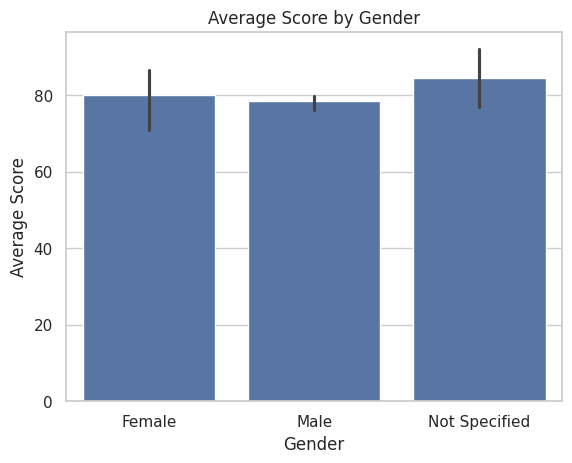

In [ ]:
# Set style
sns.set(style="whitegrid")

# Group by Gender and plot average Score
sns.barplot(data=df, x='Gender', y='Score', estimator='mean')
plt.title("Average Score by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")
plt.show()


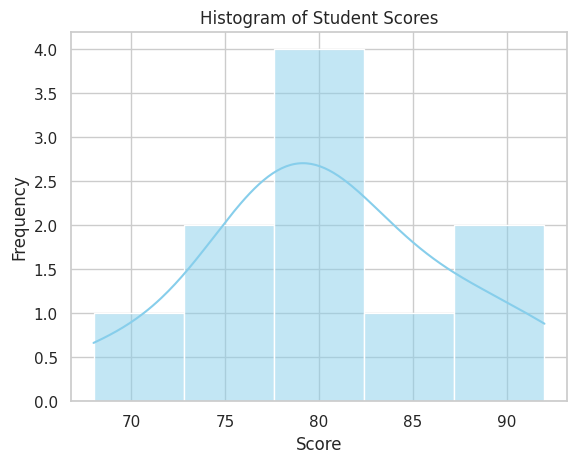

In [ ]:
#histogram
sns.histplot(data=df, x='Score', bins=5, kde=True, color='skyblue')
plt.title("Histogram of Student Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


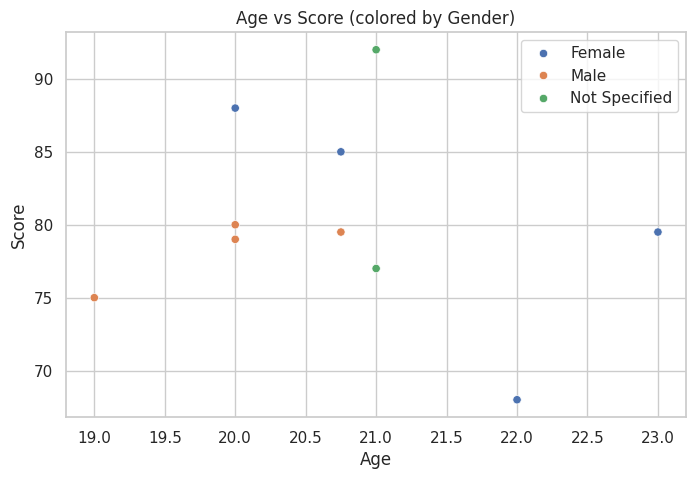

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Score', hue='Gender')
plt.title("Age vs Score (colored by Gender)")
plt.xlabel("Age")
plt.ylabel("Score")
plt.legend()
plt.show()
